In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib 
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [127]:
buses_2k = pd.read_csv('2k_capstone.csv')

In [128]:
buses_2k.head()

,PGen (MW),PMax (MW),PMin (MW),QGen (Mvar),QMax (Mvar),QMin (Mvar),Mbase (MVA)
0,158.250,211.0,63.30,-30.380,44.94,-30.38,253.20
1,25.730,34.3,10.29,-4.354,7.31,-4.94,41.16
2,61.870,82.5,24.75,-11.880,17.57,-11.88,99.00
3,9.972,10.0,3.00,0.000,0.00,0.00,12.00
4,149.630,199.5,59.85,-23.151,42.49,-28.73,239.40


In [129]:
input = ['PMax (MW)']
output = ['QMax (Mvar)', 'QMin (Mvar)']

In [130]:
X_2k = buses_2k[input]
y_2k = buses_2k[output]
X_train, X_test, y_train, y_test = train_test_split(X_2k, y_2k, test_size=0.2, random_state = 98)
clf = MultiOutputRegressor(RandomForestRegressor(max_depth = 2, random_state = 0))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [131]:
# MSE
print (mean_squared_error(y_test, y_predict))

299.19584560824507


In [132]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

17.297278560751835

In [133]:
# Score
r2_score(y_test,y_predict)

0.9191146301279168

In [134]:
y_train['QMax (Mvar)'].shape

(435,)

In [135]:
y_predict[:,0].reshape(-1,1).shape
#y_predict_re2 = y_predict[:,1].reshape(-1,1).shape


(109, 1)

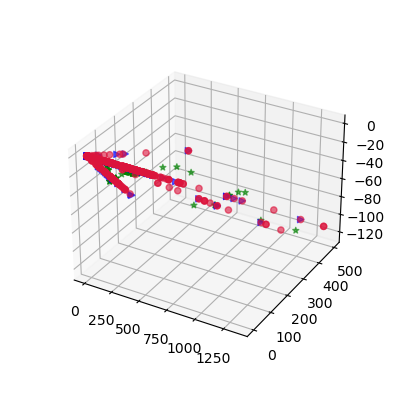

In [140]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train, y_train[['QMax (Mvar)']], y_train[['QMin (Mvar)']], marker='o', color="crimson", alpha=0.6, label="training set")
ax.scatter(X_test, y_test[['QMax (Mvar)']], y_test[['QMin (Mvar)']], marker='>', color="blue", alpha=0.6, label="testing set")
ax.scatter(X_test, y_predict[:,0].reshape(-1,1), y_predict[:,1].reshape(-1,1), marker = '*', color="green", alpha=0.6, label="predict set")